In [1]:
#Connect to data in google drive
#History file copied to google drive
from google.colab import drive
import os
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Masters/Data 606/Data
path=os.getcwd()

/content/drive/My Drive/Masters/Data 606


In [3]:
import pandas as pd

In [4]:
files=os.listdir()
files

['redfin_2024-06-04-04-03-29.csv',
 'redfin_2024-06-04-16-27-33.csv',
 'redfin_2024-06-04-16-27-48.csv',
 'redfin_2024-06-04-16-28-00.csv',
 'redfin_2024-06-04-16-28-23.csv',
 'redfin_2024-06-04-16-28-34.csv',
 'redfin_2024-06-04-16-28-44.csv',
 'redfin_2024-06-04-16-29-10.csv',
 'redfin_2024-06-04-16-29-19.csv',
 'redfin_2024-06-04-16-29-30.csv',
 'redfin_2024-06-04-16-59-59.csv',
 'VA_redfin_2024-06-04-17-34-06.csv',
 'VA_redfin_2024-06-04-17-34-18.csv',
 'VA_redfin_2024-06-04-17-34-46.csv',
 'VA_redfin_2024-06-04-17-34-58.csv',
 'VA_redfin_2024-06-04-17-35-13.csv',
 'VA_redfin_2024-06-04-17-35-21.csv',
 'VA_redfin_2024-06-04-17-35-30.csv',
 'VA_redfin_2024-06-04-17-35-38.csv',
 'VA_redfin_2024-06-04-17-36-07.csv',
 'VA_redfin_2024-06-04-17-36-16.csv',
 'VA_redfin_2024-06-04-17-36-28.csv']

In [5]:
df_list=[]
for x in files:
  df=pd.read_csv(x)
  #the first row of the data is information and not samples
  df.drop(0, axis=0, inplace=True)
  df_list.append(df)

In [6]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [7]:
df=pd.concat(df_list)
#remove rows with no sell date
df = df[df['SOLD DATE'].notna()]
#remove duplicate rows
df['duplicates']=df.duplicated()
df=df[df['duplicates']==False]
#remove empty columns
df = df.dropna(axis=1, how='all')
#remove rows where home was sold more than three months ago
df['SOLD DATE']=pd.to_datetime(df['SOLD DATE'], format='mixed')
df=df[df['SOLD DATE']>'2024-03-04']
#reset index
df.reset_index(inplace=True)

#Fill N/A HOA columns to 0
df['HOA/MONTH'].fillna(0, inplace=True)

#remove parking lots and vacant land
df=df[df['PROPERTY TYPE'].isin(['Multi-Family (2-4 Unit)', 'Condo/Co-op', 'Townhouse', 'Single Family Residential'])]

<ipython-input-7-719e776712ed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOA/MONTH'].fillna(0, inplace=True)


In [8]:
df.columns

Index(['index', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET',
       'HOA/MONTH', 'STATUS',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
       'duplicates'],
      dtype='object')

In [9]:
#Pick important columns to keep
df=df[['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']]

In [10]:
df

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE
0,2024-04-15,Condo/Co-op,1391 Pennsylvania Ave SE #354,Washington,DC,20003.0,295000.0,0.0,1.0,Old City 1,451.0,NaN,2007.0,310.0,38.880206,-76.987612
1,2024-05-10,Townhouse,1346 K St SE,Washington,DC,20003.0,560000.0,3.0,1.0,Old City 1,1400.0,1752.0,1926.0,0.0,38.878566,-76.986884
2,2024-03-28,Condo/Co-op,1391 Pennsylvania Ave SE #311,Washington,DC,20003.0,695000.0,2.0,2.0,Old City 1,1234.0,NaN,2007.0,831.0,38.880206,-76.987612
3,2024-03-22,Townhouse,1507 Freedom Way SE,Washington,DC,20003.0,785000.0,3.0,3.5,HILL EAST,1766.0,NaN,1979.0,0.0,38.879773,-76.982862
4,2024-04-15,Condo/Co-op,1391 Pennsylvania Ave SE #426,Washington,DC,20003.0,425000.0,1.0,1.0,Old City 1,684.0,NaN,2007.0,475.0,38.880206,-76.987612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2024-04-26,Single Family Residential,2706 Valley Dr,Alexandria,VA,22302.0,1625000.0,5.0,4.5,BRADDOCK HEIGHTS,3600.0,7050.0,1940.0,0.0,38.828810,-77.079460
2425,2024-05-16,Condo/Co-op,3212 Wellington Rd #103,Alexandria,VA,22302.0,429000.0,2.0,1.0,PARKFAIRFAX,900.0,NaN,1941.0,542.0,38.834207,-77.077879
2426,2024-04-12,Townhouse,1724 Preston Rd,Alexandria,VA,22302.0,422000.0,2.0,1.0,PARKFAIRFAX,930.0,NaN,1941.0,561.0,38.835865,-77.082432
2427,2024-04-26,Condo/Co-op,1606 Ripon Pl,Alexandria,VA,22302.0,380000.0,2.0,1.0,PARKFAIRFAX,900.0,NaN,1941.0,495.0,38.834562,-77.082253


In [11]:
nunique = df.nunique()
nunique

SOLD DATE               72
PROPERTY TYPE            4
ADDRESS               2411
CITY                    14
STATE OR PROVINCE        3
ZIP OR POSTAL CODE      47
PRICE                 1022
BEDS                    11
BATHS                   15
LOCATION               423
SQUARE FEET           1448
LOT SIZE              1010
YEAR BUILT             155
HOA/MONTH              695
LATITUDE              2029
LONGITUDE             2010
dtype: int64

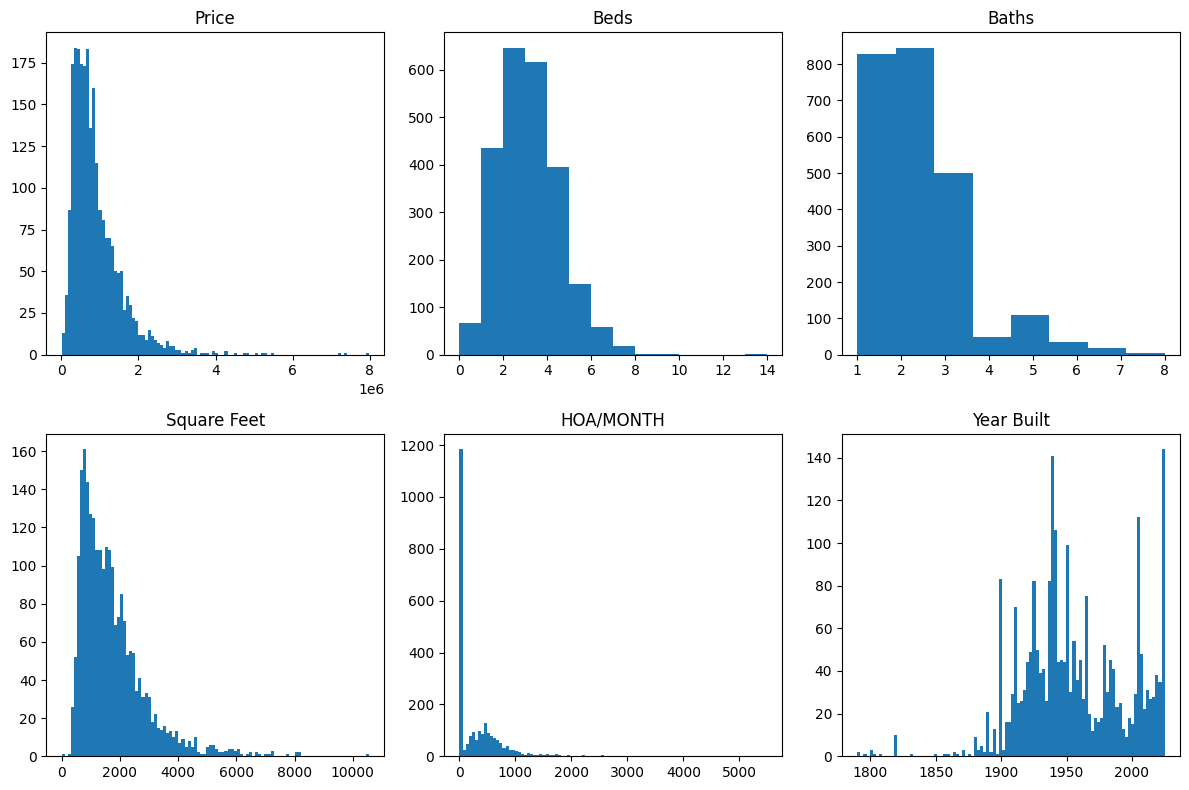

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].hist(df['PRICE'], bins=100)
axes[0, 0].set_title('Price')
axes[0, 1].hist(df['BEDS'], bins=14)
axes[0, 1].set_title('Beds')
axes[0, 2].hist(df['BATHS'], bins=8)
axes[0, 2].set_title('Baths')
axes[1, 0].hist(df['SQUARE FEET'], bins=100)
axes[1, 0].set_title('Square Feet')
axes[1, 1].hist(df['HOA/MONTH'], bins=100)
axes[1, 1].set_title('HOA/MONTH')
axes[1, 2].hist(df['YEAR BUILT'], bins=100)
axes[1, 2].set_title('Year Built')
plt.tight_layout()
plt.show()


In [13]:
citytokeep=['Alexandria', 'Washington', 'Arlington', 'Falls Church']
df[~df.CITY.isin(citytokeep)]

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE
56,2024-06-03,Condo/Co-op,3934-B Stone Gate Dr Unit B,Suitland,MD,20746.0,90000.0,1.0,1.0,STONEGATE CONDO- PHASE III,675.0,1655.0,1961.0,270.0,38.861252,-76.948067
62,2024-03-11,Townhouse,602 Maury Ave,Oxon Hill,MD,20745.0,222000.0,3.0,1.0,GLASSMANOR,1512.0,2001.0,1950.0,0.0,38.821974,-76.999653
97,2024-03-18,Single Family Residential,704 Maury Ave,Oxon Hill,MD,20745.0,425000.0,4.0,2.0,GLASSMANOR,2613.0,6116.0,1956.0,0.0,38.823467,-76.997540
117,2024-05-17,Single Family Residential,4911 Maury Pl,Oxon Hill,MD,20745.0,377000.0,4.0,3.0,GLASSMANOR,1683.0,6401.0,1955.0,0.0,38.822803,-76.996640
159,2024-04-02,Townhouse,4703 Springmaid Ln,Oxon Hill,MD,20745.0,340000.0,3.0,3.0,FOSTERS OVERLOOK PLAT 1>,1296.0,1500.0,2004.0,81.0,38.827132,-76.992277
217,2024-04-05,Condo/Co-op,3011 Southern Ave Unit T-1,Temple Hills,MD,20748.0,85000.0,1.0,1.0,KINGS CROSSING CONDO-PHASE 1>,651.0,NaN,2000.0,249.0,38.850974,-76.962461
229,2024-04-16,Single Family Residential,4267 Southern Ave,Capitol Heights,MD,20743.0,290000.0,2.0,2.0,BOULEVARD HEIGHTS,1760.0,4000.0,1946.0,0.0,38.869402,-76.938914
237,2024-04-05,Condo/Co-op,3926-D Stone Gate Dr Unit D,Suitland,MD,20746.0,110000.0,2.0,1.0,STONEGATE CONDO- PHASE II,675.0,NaN,1961.0,374.0,38.861505,-76.948215
391,2024-03-08,Single Family Residential,4315 R St,Capitol Heights,MD,20743.0,399500.0,4.0,2.0,BEAVER HEIGHTS,2737.0,5200.0,1926.0,0.0,38.911982,-76.932361
726,2024-05-02,Single Family Residential,2101 Queens Chapel Rd,Hyattsville,MD,20782.0,495000.0,3.0,2.0,NORTH WOODRIDGE,1120.0,8371.0,1950.0,0.0,38.946650,-76.975995


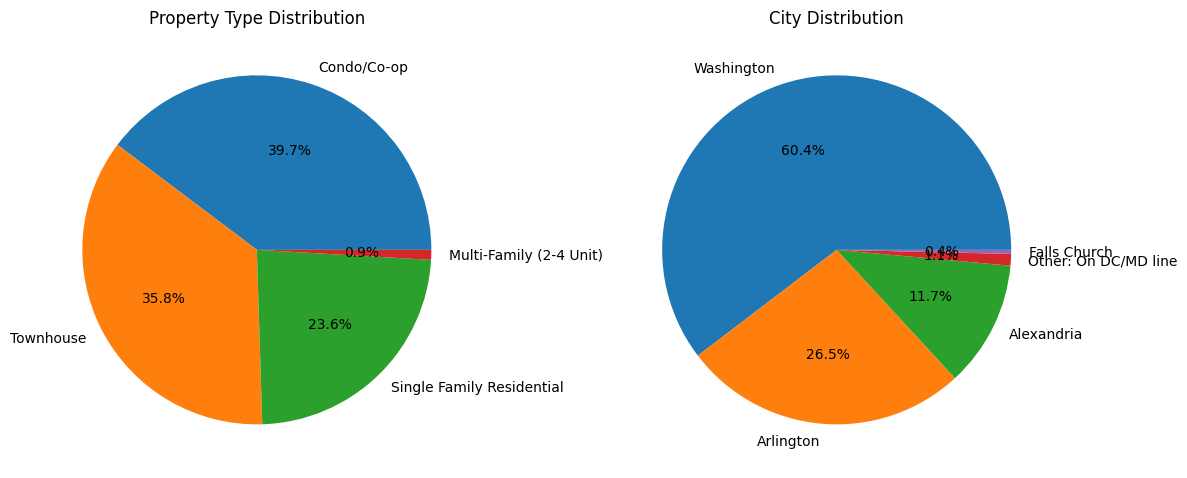

In [14]:
#To allow for Maryland Citys to be grouped together
df_forpie=df.copy()
def transformcity(x):
  if x in citytokeep:
    return x
  else: return 'Other: On DC/MD line'
df_forpie['cityforchart'] = df['CITY'].apply(transformcity)

property_types = df['PROPERTY TYPE'].value_counts()
city_types=df_forpie['cityforchart'].value_counts()

#Piecharts
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].pie(property_types, labels=property_types.index, autopct='%1.1f%%')
axes[0].set_title('Property Type Distribution')
axes[1].pie(city_types, labels=city_types.index, autopct='%1.1f%%')
axes[1].set_title('City Distribution')

plt.tight_layout()
plt.show()

In [ ]:
!pip install folium
import folium

map = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=12)
for _, row in df.iterrows():
  marker = folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=row['ADDRESS'])
  map.add_child(marker)

map


Output hidden; open in https://colab.research.google.com to view.

In [17]:
%cd /content/drive/My Drive/Masters/Data 606
path=os.getcwd()

df.to_csv(path+'finalcsv.csv')

/content/drive/My Drive/Masters/Data 606
